In [1]:
#dataframes
import pandas as pd
import h5py
import datetime as dt

#math
import numpy as np
import math
import scipy.fftpack
from scipy import signal
import scipy.interpolate as interpolate
from scipy import integrate
from scipy import stats
pd.TimeSeries = pd.Series 

#gps
from geopy import distance

#plots
import pylab as plt
import matplotlib.pyplot as plt
import figurefirst
import matplotlib.animation as animation

### Stationary Wind Bag B

In [5]:
#mac 
# fname = '~/Documents/Myfiles/DataAnalysis/data/20201020_172919_windy_b_data.hdf'
fname = '~/Documents/Myfiles/DataAnalysis/data/Sprints/Forest/Forest.h5'
wind=pd.read_hdf(fname)
wind.keys()

Index(['master_time', 'xsrc', 'ysrc', 'odor', 'trisonica_u', 'trisonica_v',
       'trisonica_pressure', 'trisonica_temperature', 'gps_linear_x',
       'gps_linear_y', 'gps_linear_z', 'imu_angular_x', 'imu_angular_y',
       'imu_angular_z', 'imu_linear_acc_x', 'imu_linear_acc_y',
       'imu_linear_acc_z', 'U', 'V', 'D', 'S2', 'time', 'corrected_u',
       'corrected_v', 'distance_from_source', 'eastwest', 'northsouth',
       'odorsim', 'relative_parallel_comp', 'relative_perpendicular_comp',
       'nearest_from_streakline'],
      dtype='object')

Text(0, 0.5, 'Y Position, m')

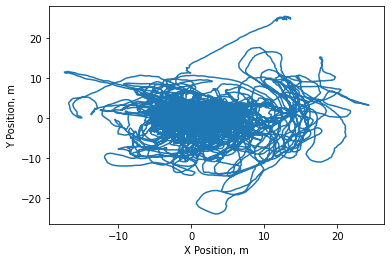

In [13]:
# plt.plot(wind.time, wind.xsrc)
# plt.plot(wind.time, wind.ysrc)
plt.plot(wind.xsrc,wind.ysrc)
plt.xlabel('X Position, m')
plt.ylabel('Y Position, m')

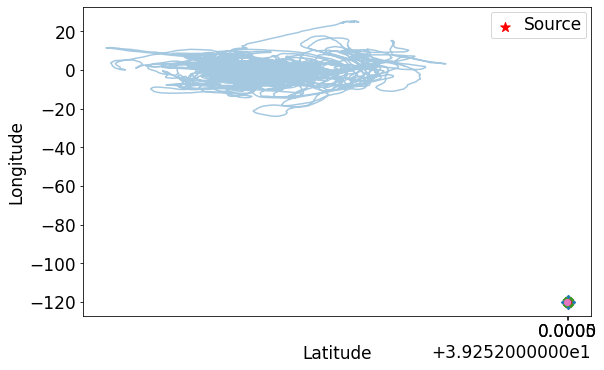

In [8]:
f,ax=plt.subplots(1,1,figsize=(8,5))
# ax.plot(wind.xsrc,wind.ysrc)
ax.scatter(39.252441,-119.878037, marker= "*", label='Source',c='r', s=102)
ax.plot(wind.xsrc,wind.ysrc, alpha=0.4)
ax.scatter(39.252392, -119.878174, marker='D', s=102)
ax.scatter(39.252384, -119.878288, marker="X", s=102)
ax.scatter(39.252422, -119.878288, marker="X", s=102)
ax.scatter(39.252399, -119.878464)
ax.scatter(39.252296, -119.878082)
ax.scatter(39.252159, -119.878052)
ax.scatter(39.252064, -119.878036)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks([39.2520,39.2525])
ax.legend()
f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 17)

In [3]:
from geopy import distance

coords_1 = (39.252441,-119.878037)
coords_2 = (39.252392, -119.878174)

print (distance.distance(coords_1, coords_2).m)

13.016790002783587


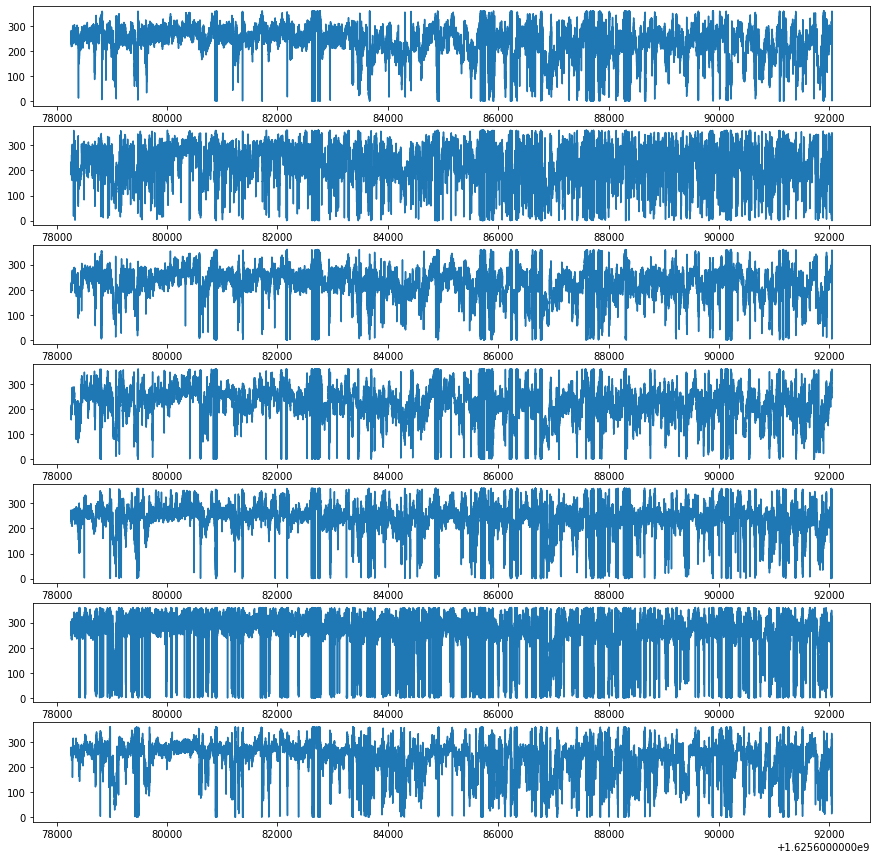

In [22]:
f,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(15,15))
ax1.plot(wind.time, wind.D_1)
ax2.plot(wind.time,wind.D_2)
ax3.plot(wind.time,wind.D_3)
ax4.plot(wind.time, wind.D_5)
ax5.plot(wind.time,wind.D_6)
ax6.plot(wind.time, wind.D_8)
ax7.plot(wind.time,wind.D_9)

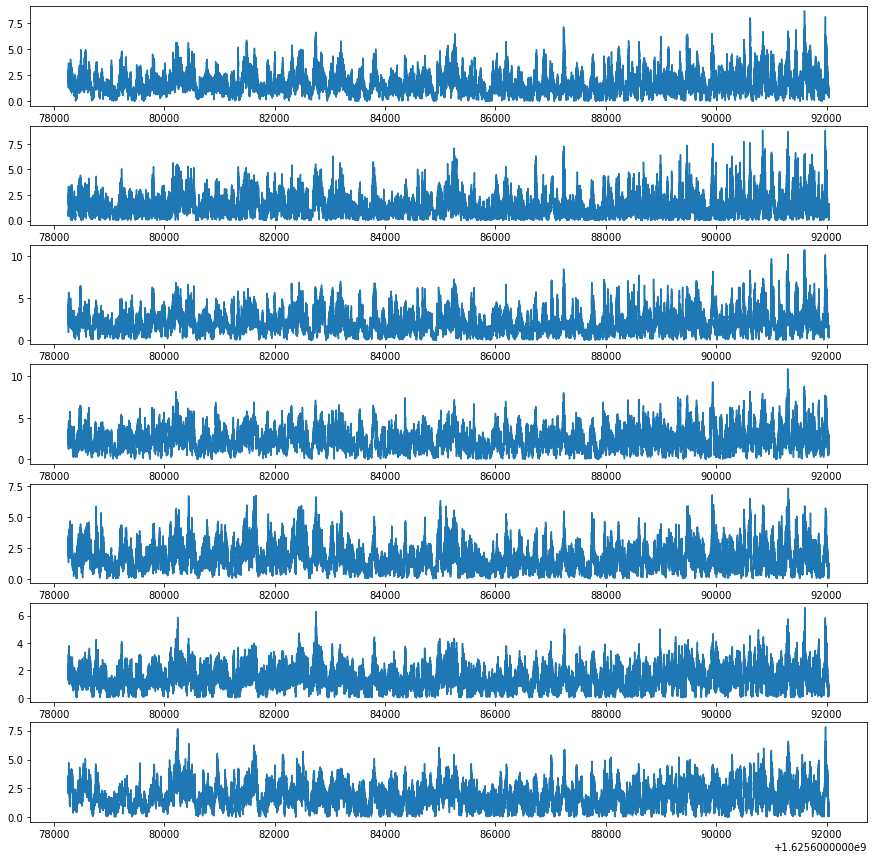

In [24]:
f,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(15,15))
ax1.plot(wind.time, wind.S2_1)
ax2.plot(wind.time,wind.S2_2)
ax3.plot(wind.time,wind.S2_3)
ax4.plot(wind.time, wind.S2_5)
ax5.plot(wind.time,wind.S2_6)
ax6.plot(wind.time, wind.S2_8)
ax7.plot(wind.time,wind.S2_9)

In [224]:
pi = np.pi/180
x = np.abs(wind.S2*np.sin(((wind.D+13)*pi)))
y = np.abs(wind.S2*np.cos(((wind.D+13)*pi)))

In [225]:
x = x*np.sign(wind.U)
y = y*np.sign(wind.V)

In [226]:
s = []
for i in range(len(x)):
    if(np.sign(x[i])!=np.sign(wind.U[i])):
        s.append(i)


In [227]:
wind['corrected_u'] = x
wind['corrected_v'] = y

In [229]:
wind.to_hdf(fname, key='wind',mode='w')

/Users/an/Documents/MyFiles/DataAnalysis/FlyDataAnalysis/lib/python3.8/site-packages/pandas/core/generic.py:2606: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['wind', 'gps_date_str', 'gps_time_str'], dtype='object')]

  pytables.to_hdf(


### Extract Wind Data for shorter duration

In [219]:
df =pd.DataFrame
df = wind.loc[(wind.time_epoch >= sensor.master_time.iloc[0]) & (wind_df.time_epoch <=sensor.master_time.iloc[-1])]

In [217]:
sensor= pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/Run03/Collections/Run03Coll01_InterpolatedX.hdf')